<img src="../src/packt-banner.png" alt="">

# Chapter 3: Data Exploration with Jupyter


We get our hands on some data and work through an exploration analysis, where we compute some interesting and informative metrics and visualizations.

We’ll be using:

 - `pandas` Python library for their tabular data structure (the pandas dataframe)

In [1]:
import pandas as pd
pd.DataFrame?

Init signature: pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
Docstring:     
Two-dimensional size-mutable, potentially heterogeneous tabular data
structure with labeled axes (rows and columns). Arithmetic operations
align on both row and column labels. Can be thought of as a dict-like
container for Series objects. The primary pandas data structure.

Parameters
----------
data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    Dict can contain Series, arrays, constants, or list-like objects

    .. versionchanged :: 0.23.0
       If data is a dict, column order follows insertion-order for
       Python 3.6 and later.

    .. versionchanged :: 0.25.0
       If data is a list of dicts, column order follows insertion-order
       for Python 3.6 and later.

index : Index or array-like
    Index to use for resulting frame. Will default to RangeIndex if
    no indexing information part of input data and no index provided
columns : Index or arr

 - `seaborn` Python library for creating visualizations. 

In [2]:
import seaborn as sns
sns.*?

sns.FacetGrid
sns.JointGrid
sns.PairGrid
sns.__builtins__
sns.__cached__
sns.__class__
sns.__delattr__
sns.__dict__
sns.__dir__
sns.__doc__
sns.__eq__
sns.__file__
sns.__format__
sns.__ge__
sns.__getattribute__
sns.__gt__
sns.__hash__
sns.__init__
sns.__init_subclass__
sns.__le__
sns.__loader__
sns.__lt__
sns.__name__
sns.__ne__
sns.__new__
sns.__package__
sns.__path__
sns.__reduce__
sns.__reduce_ex__
sns.__repr__
sns.__setattr__
sns.__sizeof__
sns.__spec__
sns.__str__
sns.__subclasshook__
sns.__version__
sns.algorithms
sns.axes_style
sns.axisgrid
sns.barplot
sns.blend_palette
sns.boxenplot
sns.boxplot
sns.categorical
sns.catplot
sns.choose_colorbrewer_palette
sns.choose_cubehelix_palette
sns.choose_dark_palette
sns.choose_diverging_palette
sns.choose_light_palette
sns.clustermap
sns.cm
sns.color_palette
sns.colors
sns.countplot
sns.crayon_palette
sns.crayons
sns.cubehelix_palette
sns.dark_palette
sns.desaturate
sns.despine
sns.distplot
sns.distributions
sns.diverging_palette
sns.dogpl

---

## Our first Analysis: the Boston Housing Dataset   
We explore the Boston housing dataset, which contains US census data concerning houses in various areas around the city of Boston.

---

### Python Libraries   

---

In [3]:
# Common standard libraries

import datetime
import time
import os

In [4]:
# Common external libraries

import pandas as pd
import numpy as np
import sklearn # scikit-learn
import requests
from bs4 import BeautifulSoup

In [5]:
# Visualization libraries

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Setting plot appearance
# See here for more options: https://matplotlib.org/users/customizing.html

%config InlineBackend.figure_format='retina'
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (9, 6)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")

---

### Loading the data

---

In [7]:
from sklearn import datasets
boston = datasets.load_boston()

In [8]:
type(boston)

sklearn.utils.Bunch

In [9]:
from sklearn.utils import Bunch
Bunch?

Init signature: Bunch(**kwargs)
Docstring:     
Container object for datasets

Dictionary-like object that exposes its keys as attributes.

>>> b = Bunch(a=1, b=2)
>>> b['b']
2
>>> b.b
2
>>> b.a = 3
>>> b['a']
3
>>> b.c = 6
>>> b['c']
6
File:           /anaconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py
Type:           type
Subclasses:     


In [10]:
# What fields are in the dictionary?
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [11]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [12]:
import pandas as pd
pd.DataFrame?

Init signature: pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
Docstring:     
Two-dimensional size-mutable, potentially heterogeneous tabular data
structure with labeled axes (rows and columns). Arithmetic operations
align on both row and column labels. Can be thought of as a dict-like
container for Series objects. The primary pandas data structure.

Parameters
----------
data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    Dict can contain Series, arrays, constants, or list-like objects

    .. versionchanged :: 0.23.0
       If data is a dict, column order follows insertion-order for
       Python 3.6 and later.

    .. versionchanged :: 0.25.0
       If data is a list of dicts, column order follows insertion-order
       for Python 3.6 and later.

index : Index or array-like
    Index to use for resulting frame. Will default to RangeIndex if
    no indexing information part of input data and no index provided
columns : Index or arr

In [13]:
# What does the data look like?
boston['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [14]:
boston['data'].shape

(506, 13)

In [15]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [16]:
# Load the data
df = pd.DataFrame(
    data=boston['data'],
    columns=boston['feature_names'],
)

In [17]:
# Still need to add the target variable
boston['target'].shape

(506,)

In [18]:
df['MEDV'] = boston['target']

In [19]:
# Move the target variable to the front of the table
y = df.MEDV.copy()
del df['MEDV']
df = pd.concat((y, df), axis=1)

In [20]:
df.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [21]:
df.tail(10)

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
496,19.7,0.28960,0.0,9.69,0.0,0.585,5.390,72.9,2.7986,6.0,391.0,19.2,396.90,21.14
497,18.3,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6.0,391.0,19.2,396.90,14.10
498,21.2,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6.0,391.0,19.2,396.90,12.92
499,17.5,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6.0,391.0,19.2,395.77,15.10
500,16.8,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33
501,22.4,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,20.6,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,23.9,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,22.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,11.9,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [22]:
len(df)

506

In [23]:
df.dtypes

MEDV       float64
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [24]:
# Identify and NaNs
df.isnull().sum()

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [25]:
# Removing some columns
for col in ['ZN', 'NOX', 'RAD', 'PTRATIO', 'B']:
    del df[col]

---

### Data exploration    

---

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MEDV,506.0,22.532806,9.197104,5.00000,17.025000,21.20000,25.000000,50.0000
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000
LSTAT,506.0,12.653063,7.141062,1.73000,6.950000,11.36000,16.955000,37.9700


In [27]:
# Focus on these columns
cols = ['RM', 'AGE', 'TAX', 'LSTAT', 'MEDV']

In [28]:
# Subset
df[cols].tail()

,RM,AGE,TAX,LSTAT,MEDV
501,6.593,69.1,273.0,9.67,22.4
502,6.120,76.7,273.0,9.08,20.6
503,6.976,91.0,273.0,5.64,23.9
504,6.794,89.3,273.0,6.48,22.0
505,6.030,80.8,273.0,7.88,11.9


In [29]:
# The pairwise correlations
df[cols].corr()

,RM,AGE,TAX,LSTAT,MEDV
RM,1.000000,-0.240265,-0.292048,-0.613808,0.695360
AGE,-0.240265,1.000000,0.506456,0.602339,-0.376955
TAX,-0.292048,0.506456,1.000000,0.543993,-0.468536
LSTAT,-0.613808,0.602339,0.543993,1.000000,-0.737663
MEDV,0.695360,-0.376955,-0.468536,-0.737663,1.000000


In [30]:
# Set up plotting environment

# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Setting plot appearance
%config InlineBackend.figure_format='retina'
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (9, 6)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")

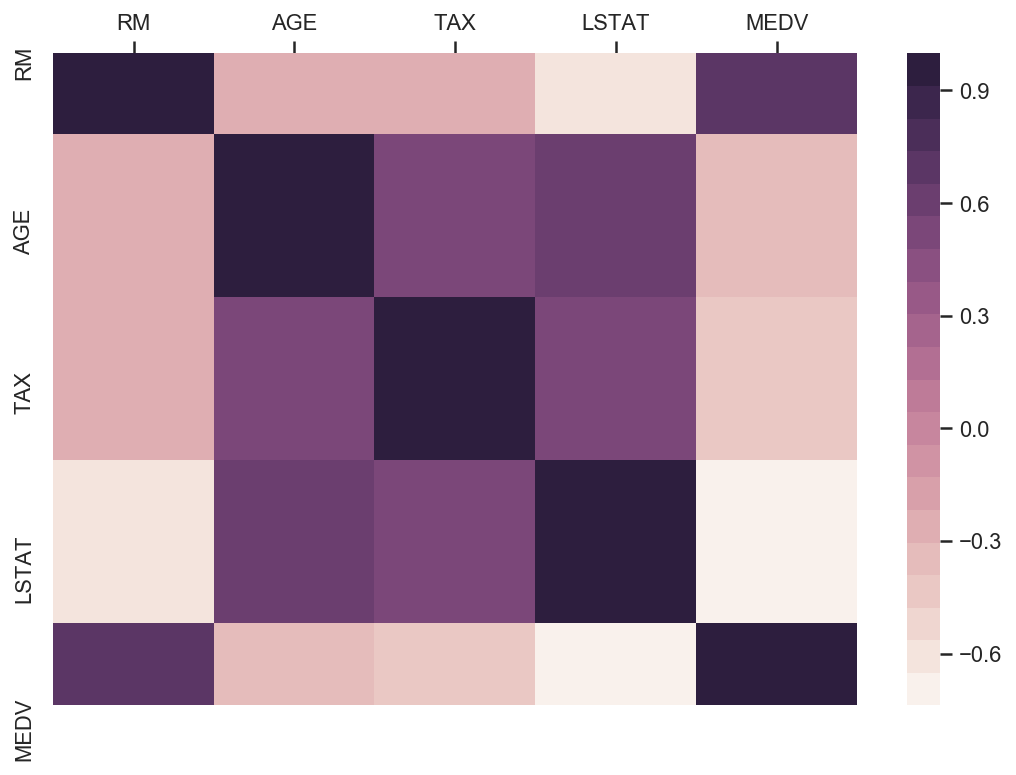

In [31]:
# Pairwise correlation heatmap

ax = sns.heatmap(
    df[cols].corr(),
    cmap=sns.cubehelix_palette(20, light=0.95, dark=0.15),
)
ax.xaxis.tick_top() # move labels to the top

plt.savefig(
    '../figures/chapter-3-boston-housing-corr.png',
    bbox_inches='tight', 
    dpi=300,
)

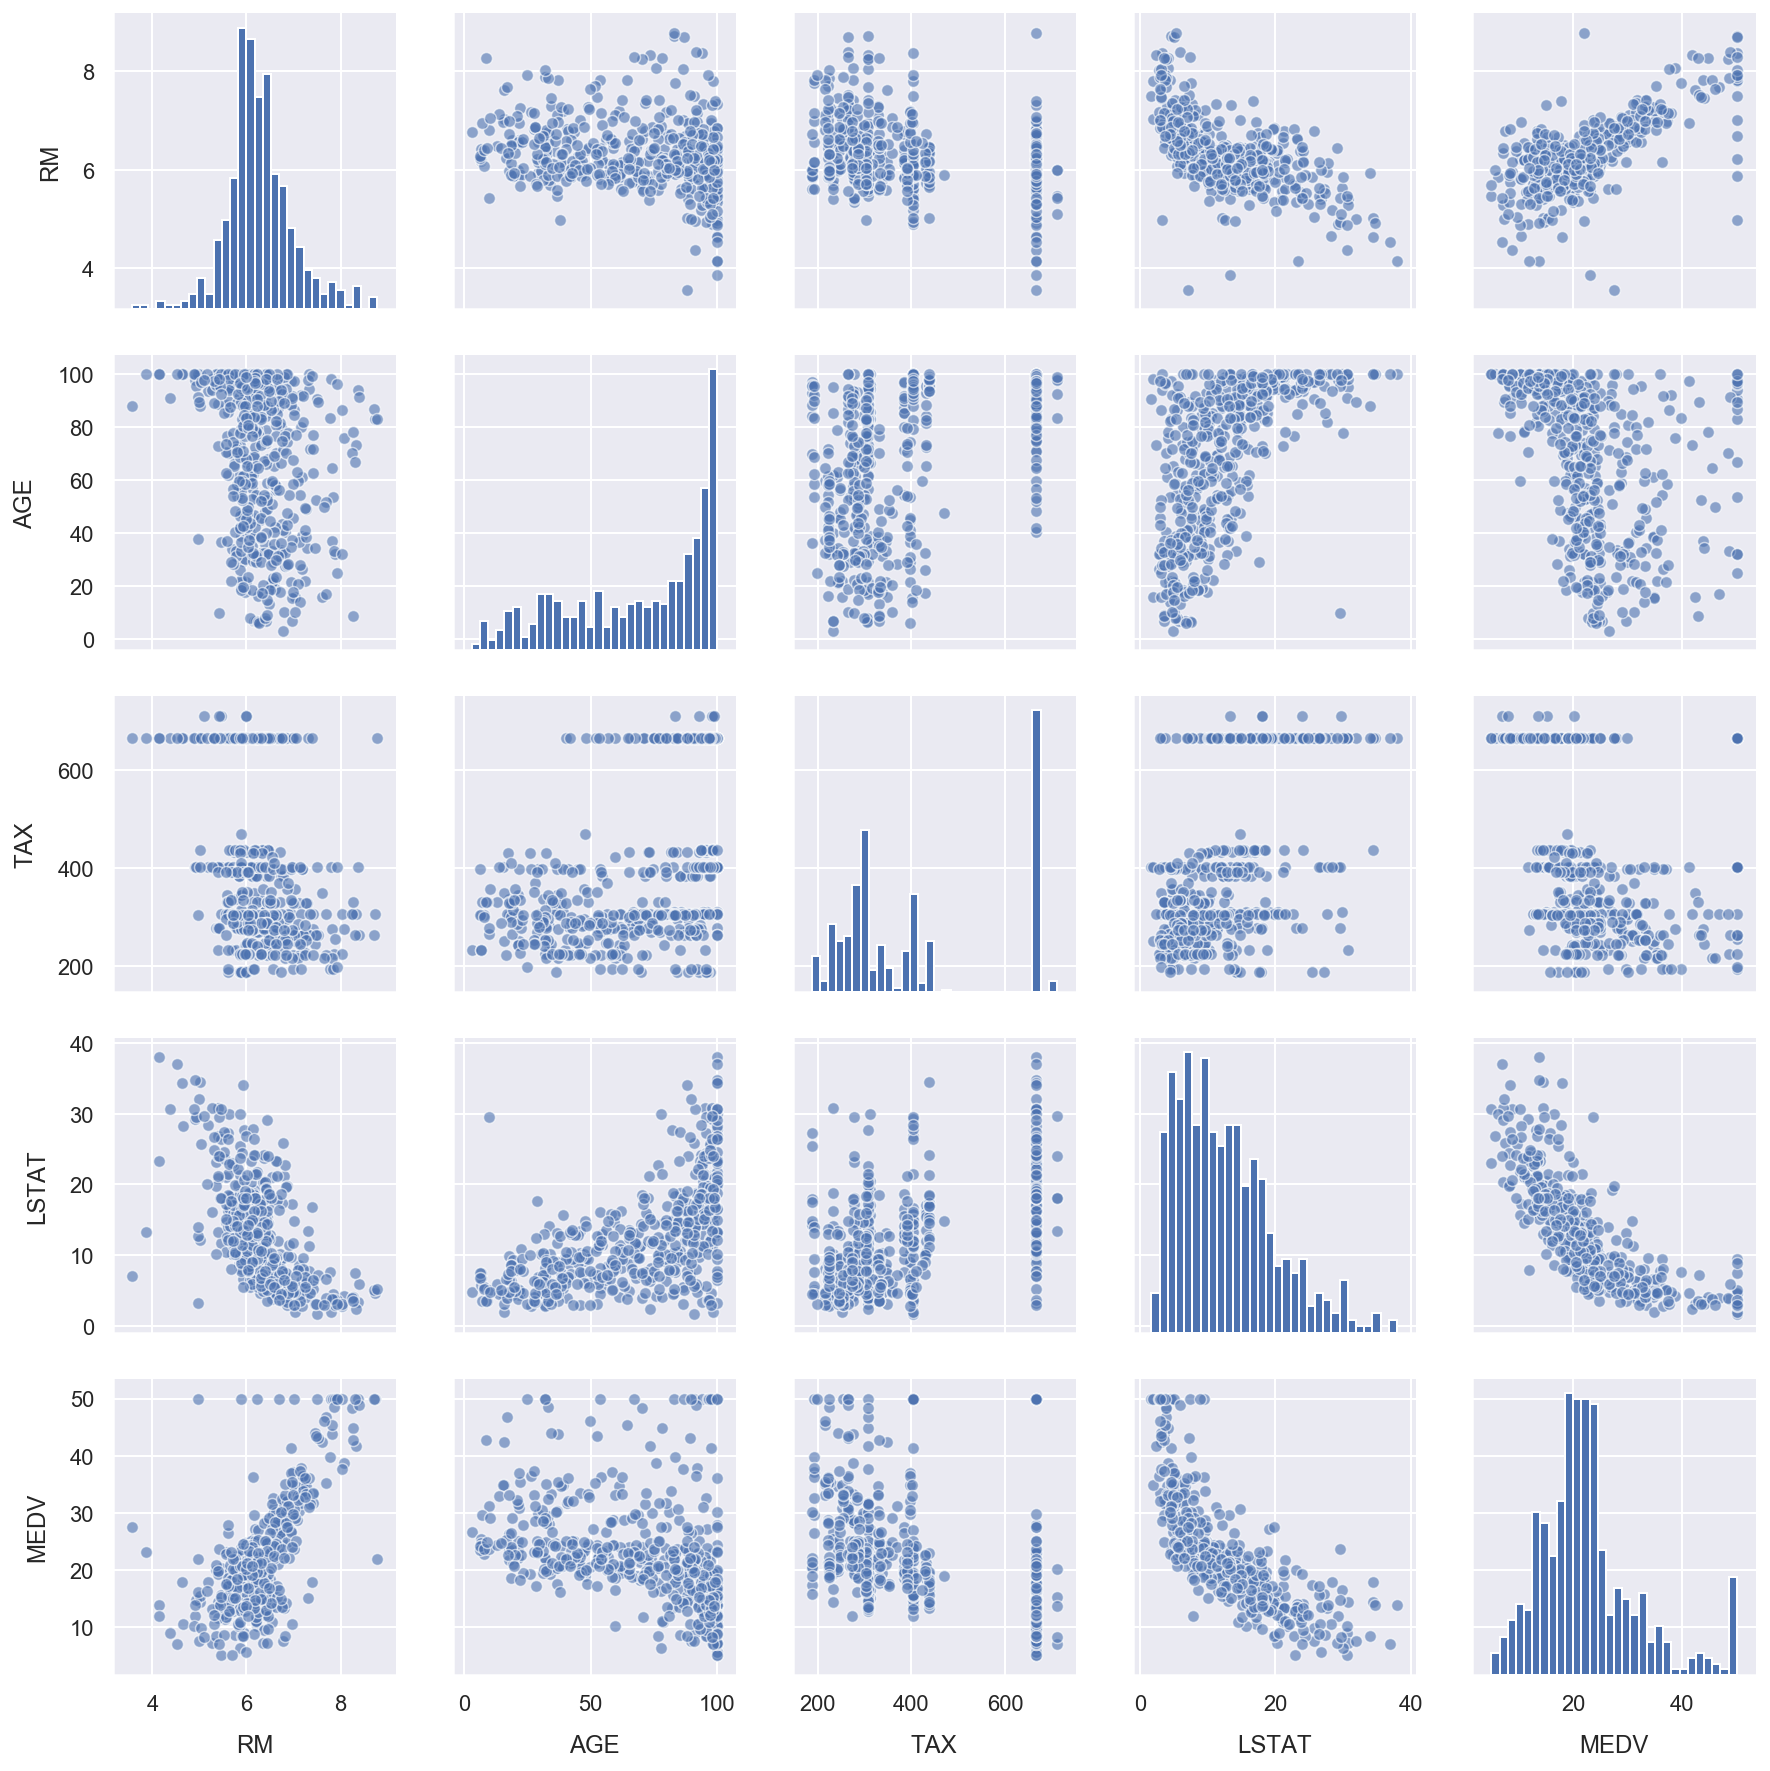

In [32]:
sns.pairplot(
    df[cols],
    plot_kws={'alpha': 0.6},
    diag_kws={'bins': 30},
)

plt.savefig(
    '../figures/chapter-3-boston-housing-pairplot.png',
    bbox_inches='tight',
    dpi=300,
)

---

### Introduction to predictive analytics   

---

In [33]:
sns.regplot?

Signature:
sns.regplot(
    x,
    y,
    data=None,
    x_estimator=None,
    x_bins=None,
    x_ci='ci',
    scatter=True,
    fit_reg=True,
    ci=95,
    n_boot=1000,
    units=None,
    order=1,
    logistic=False,
    lowess=False,
    robust=False,
    logx=False,
    x_partial=None,
    y_partial=None,
    truncate=False,
    dropna=True,
    x_jitter=None,
    y_jitter=None,
    label=None,
    color=None,
    marker='o',
    scatter_kws=None,
    line_kws=None,
    ax=None,
)
Docstring:
Plot data and a linear regression model fit.

There are a number of mutually exclusive options for estimating the
regression model. See the :ref:`tutorial <regression_tutorial>` for more
information.    

Parameters
----------
x, y: string, series, or vector array
    Input variables. If strings, these should correspond with column names
    in ``data``. When pandas objects are used, axes will be labeled with
    the series name.
data : DataFrame
    Tidy ("long-form") dataframe where each col

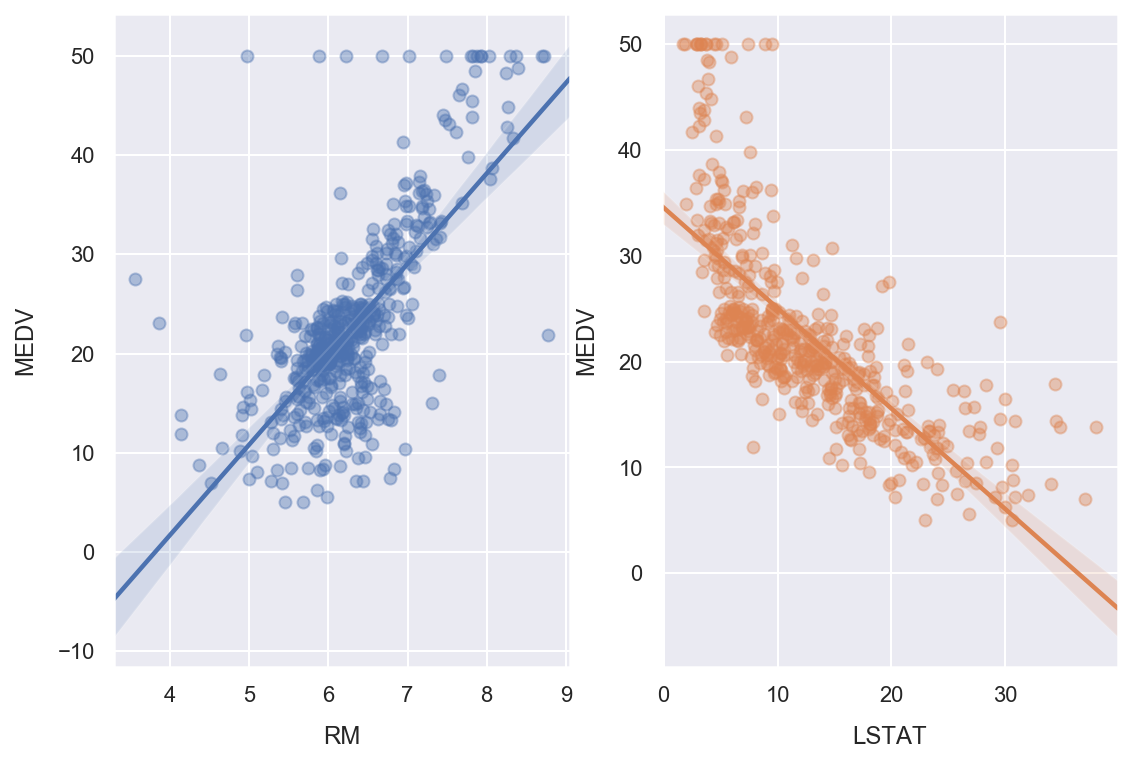

In [34]:
# Modeling MADV as a function of RM and LSTAT

fig, ax = plt.subplots(1, 2)
sns.regplot(
    x='RM',
    y='MEDV',
    data=df,
    ax=ax[0], scatter_kws={'alpha': 0.4},
)
sns.regplot(
    x='LSTAT',
    y='MEDV',
    data=df,
    ax=ax[1], scatter_kws={'alpha': 0.4},
)
plt.savefig(
    '../figures/chapter-3-boston-housing-scatter.png',
    bbox_inches='tight',
    dpi=300,
)

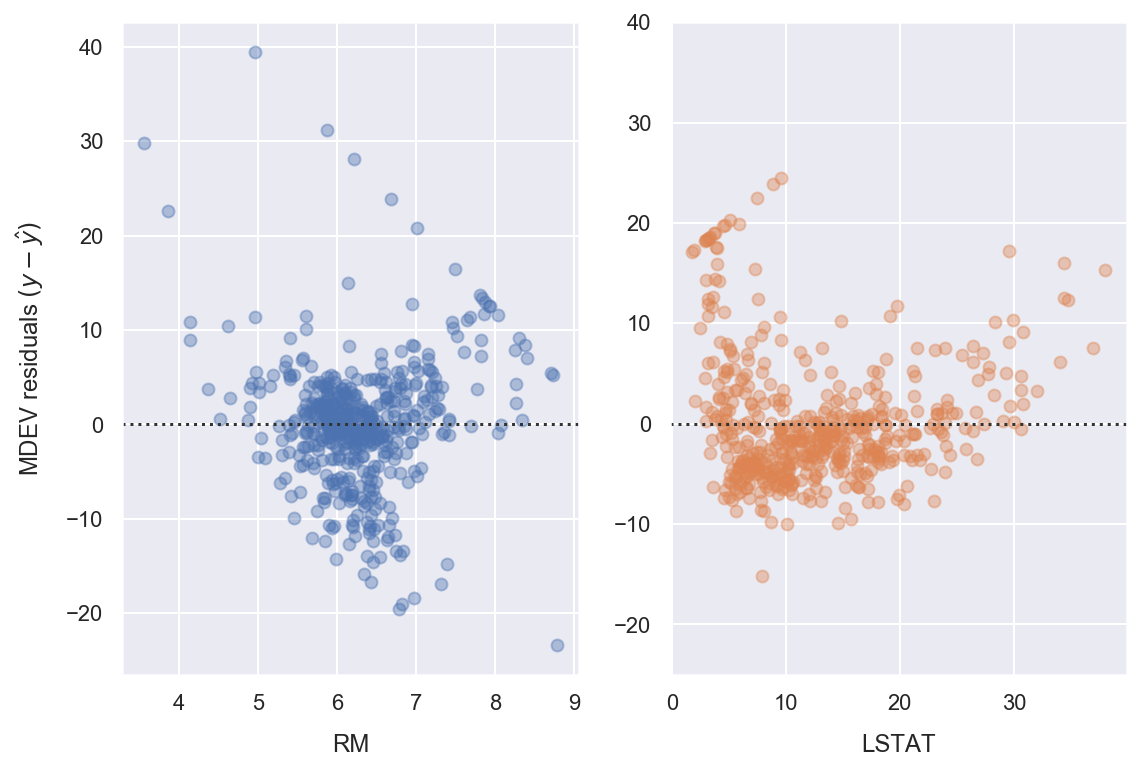

In [35]:
# Residual plots

fig, ax = plt.subplots(1, 2)
ax[0] = sns.residplot(
    x='RM',
    y='MEDV',
    data=df,
    ax=ax[0], scatter_kws={'alpha': 0.4},
)
ax[0].set_ylabel('MDEV residuals $(y-\hat{y})$')
ax[1] = sns.residplot(
    x='LSTAT',
    y='MEDV',
    data=df,
    ax=ax[1], scatter_kws={'alpha': 0.4},
)
ax[1].set_ylabel('')
plt.ylim(-25, 40)
plt.savefig(
    '../figures/chapter-3-boston-housing-residuals.png',
    bbox_inches='tight',
    dpi=300,
)

In [36]:
# MSE of linear models

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def get_mse(df, feature, target='MEDV'):
    # Get x, y to model
    y = df[target].values
    x = df[feature].values.reshape(-1,1)
    print('{} ~ {}'.format(target, feature))
    
    # Build and fit the model
    lm = LinearRegression()
    lm.fit(x, y)
    msg = (
        'model: y = {:.3f} + {:.3f}x'
        .format(lm.intercept_, lm.coef_[0])
    )
    print(msg)
    
    # Predict and determine MSE
    y_pred = lm.predict(x)
    error = mean_squared_error(y, y_pred)
    print('mse = {:.2f}'.format(error))
    print()

In [37]:
get_mse(df, 'RM')
get_mse(df, 'LSTAT')

MEDV ~ RM
model: y = -34.671 + 9.102x
mse = 43.60

MEDV ~ LSTAT
model: y = 34.554 + -0.950x
mse = 38.48



---

### Categorical feature segmentation analysis

---

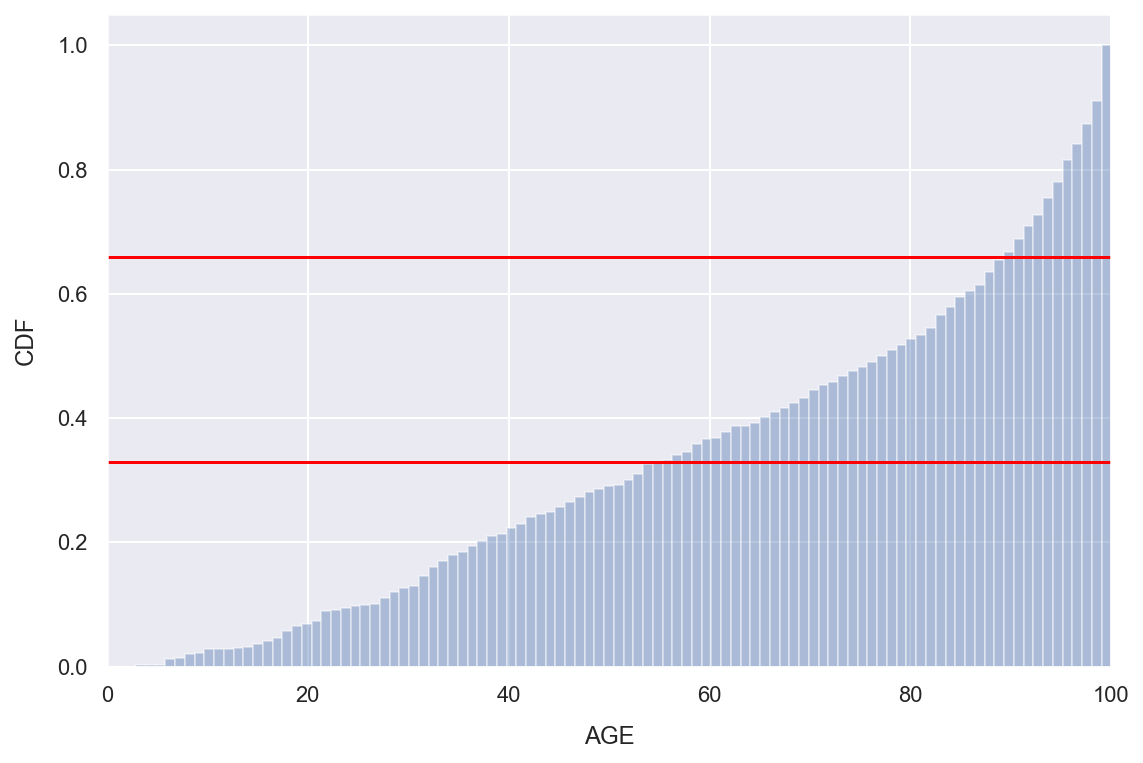

In [38]:
# Plot cumulative distribution to find places to split data

sns.distplot(
    df.AGE.values,
    bins=100,
    hist_kws={'cumulative': True},
    kde_kws={'lw': 0},
)
plt.xlabel('AGE')
plt.ylabel('CDF')
plt.axhline(0.33, color='red')
plt.axhline(0.66, color='red')
plt.xlim(0, df.AGE.max())
plt.savefig(
    '../figures/chapter-3-boston-housing-age-cdf.png',
    bbox_inches='tight',
    dpi=300,
)

In [39]:
# Categorize AGE into 3 bins

def get_age_category(x):
    if x < 50:
        age = 'Relatively New'
    elif 50 <= x < 85:
        age = 'Relatively Old'
    else:
        age = 'Very Old'
    return age

df['AGE_category'] = df.AGE.apply(get_age_category)

In [40]:
# Check the segmented counts
df.groupby('AGE_category').size()

AGE_category
Relatively New    147
Relatively Old    149
Very Old          210
dtype: int64

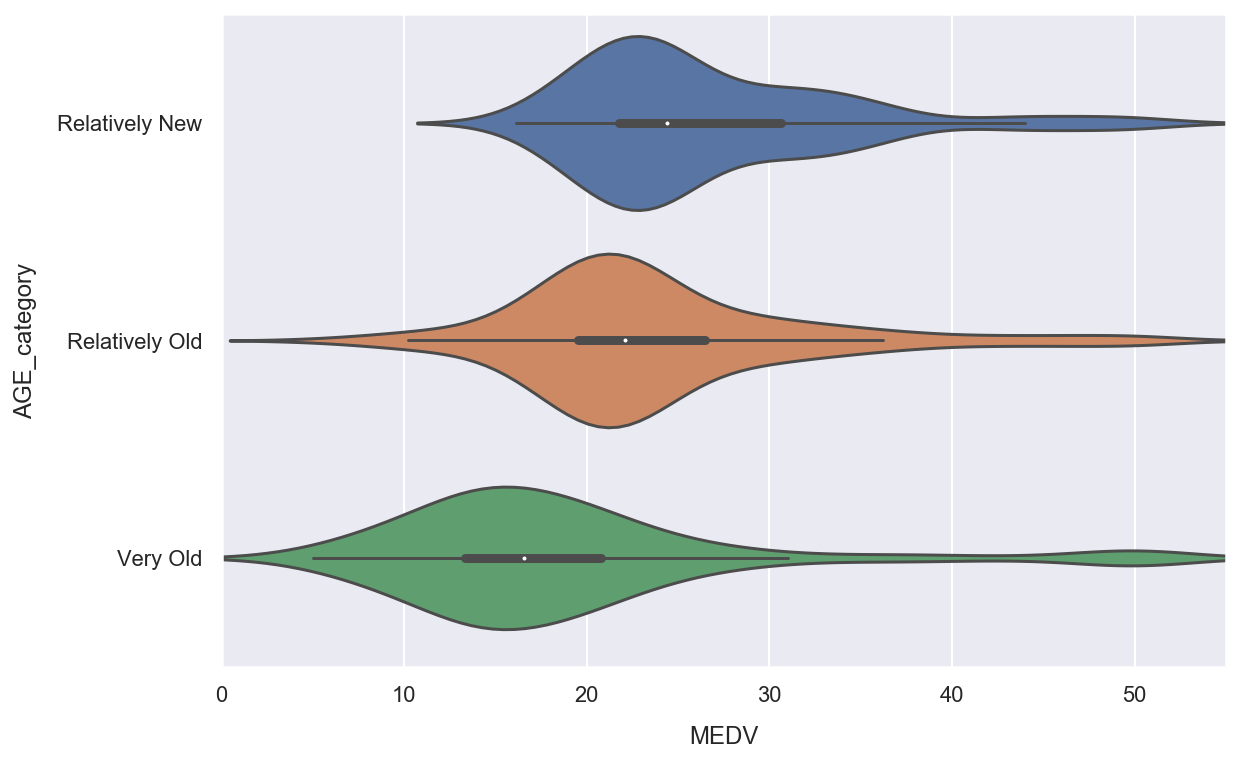

In [41]:
# How is MEDV distributed for each age category

sns.violinplot(
    x='MEDV',
    y='AGE_category',
    data=df,
    order=['Relatively New', 'Relatively Old', 'Very Old'],
)
plt.xlim(0, 55)
plt.savefig(
    '../figures/chapter-3-boston-housing-age-medv-violin.png',
    bbox_inches='tight',
    dpi=300,
)

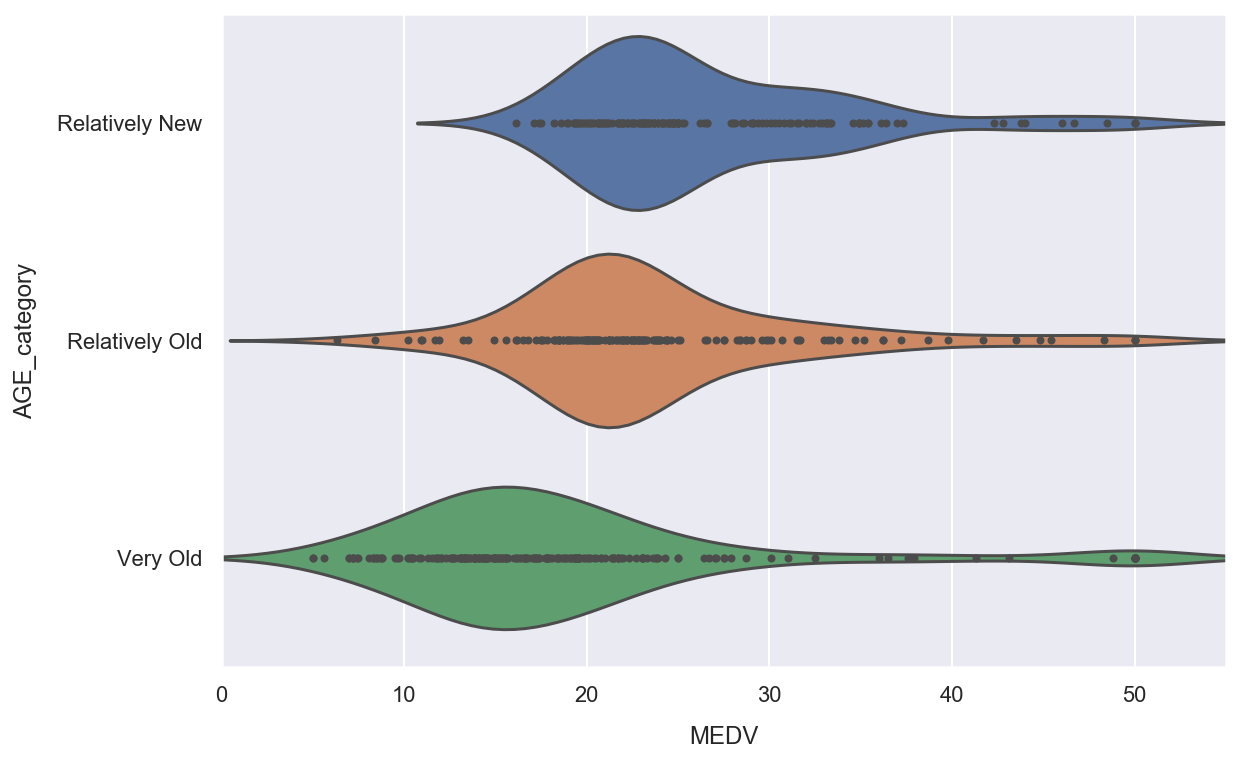

In [42]:
# Plotting the individual points

sns.violinplot(
    x='MEDV',
    y='AGE_category',
    data=df,
    order=['Relatively New', 'Relatively Old', 'Very Old'],
    inner='point',
)
plt.xlim(0, 55)
plt.savefig(
    '../figures/chapter-3-boston-housing-age-medv-violin-points.png',
    bbox_inches='tight',
    dpi=300,
)

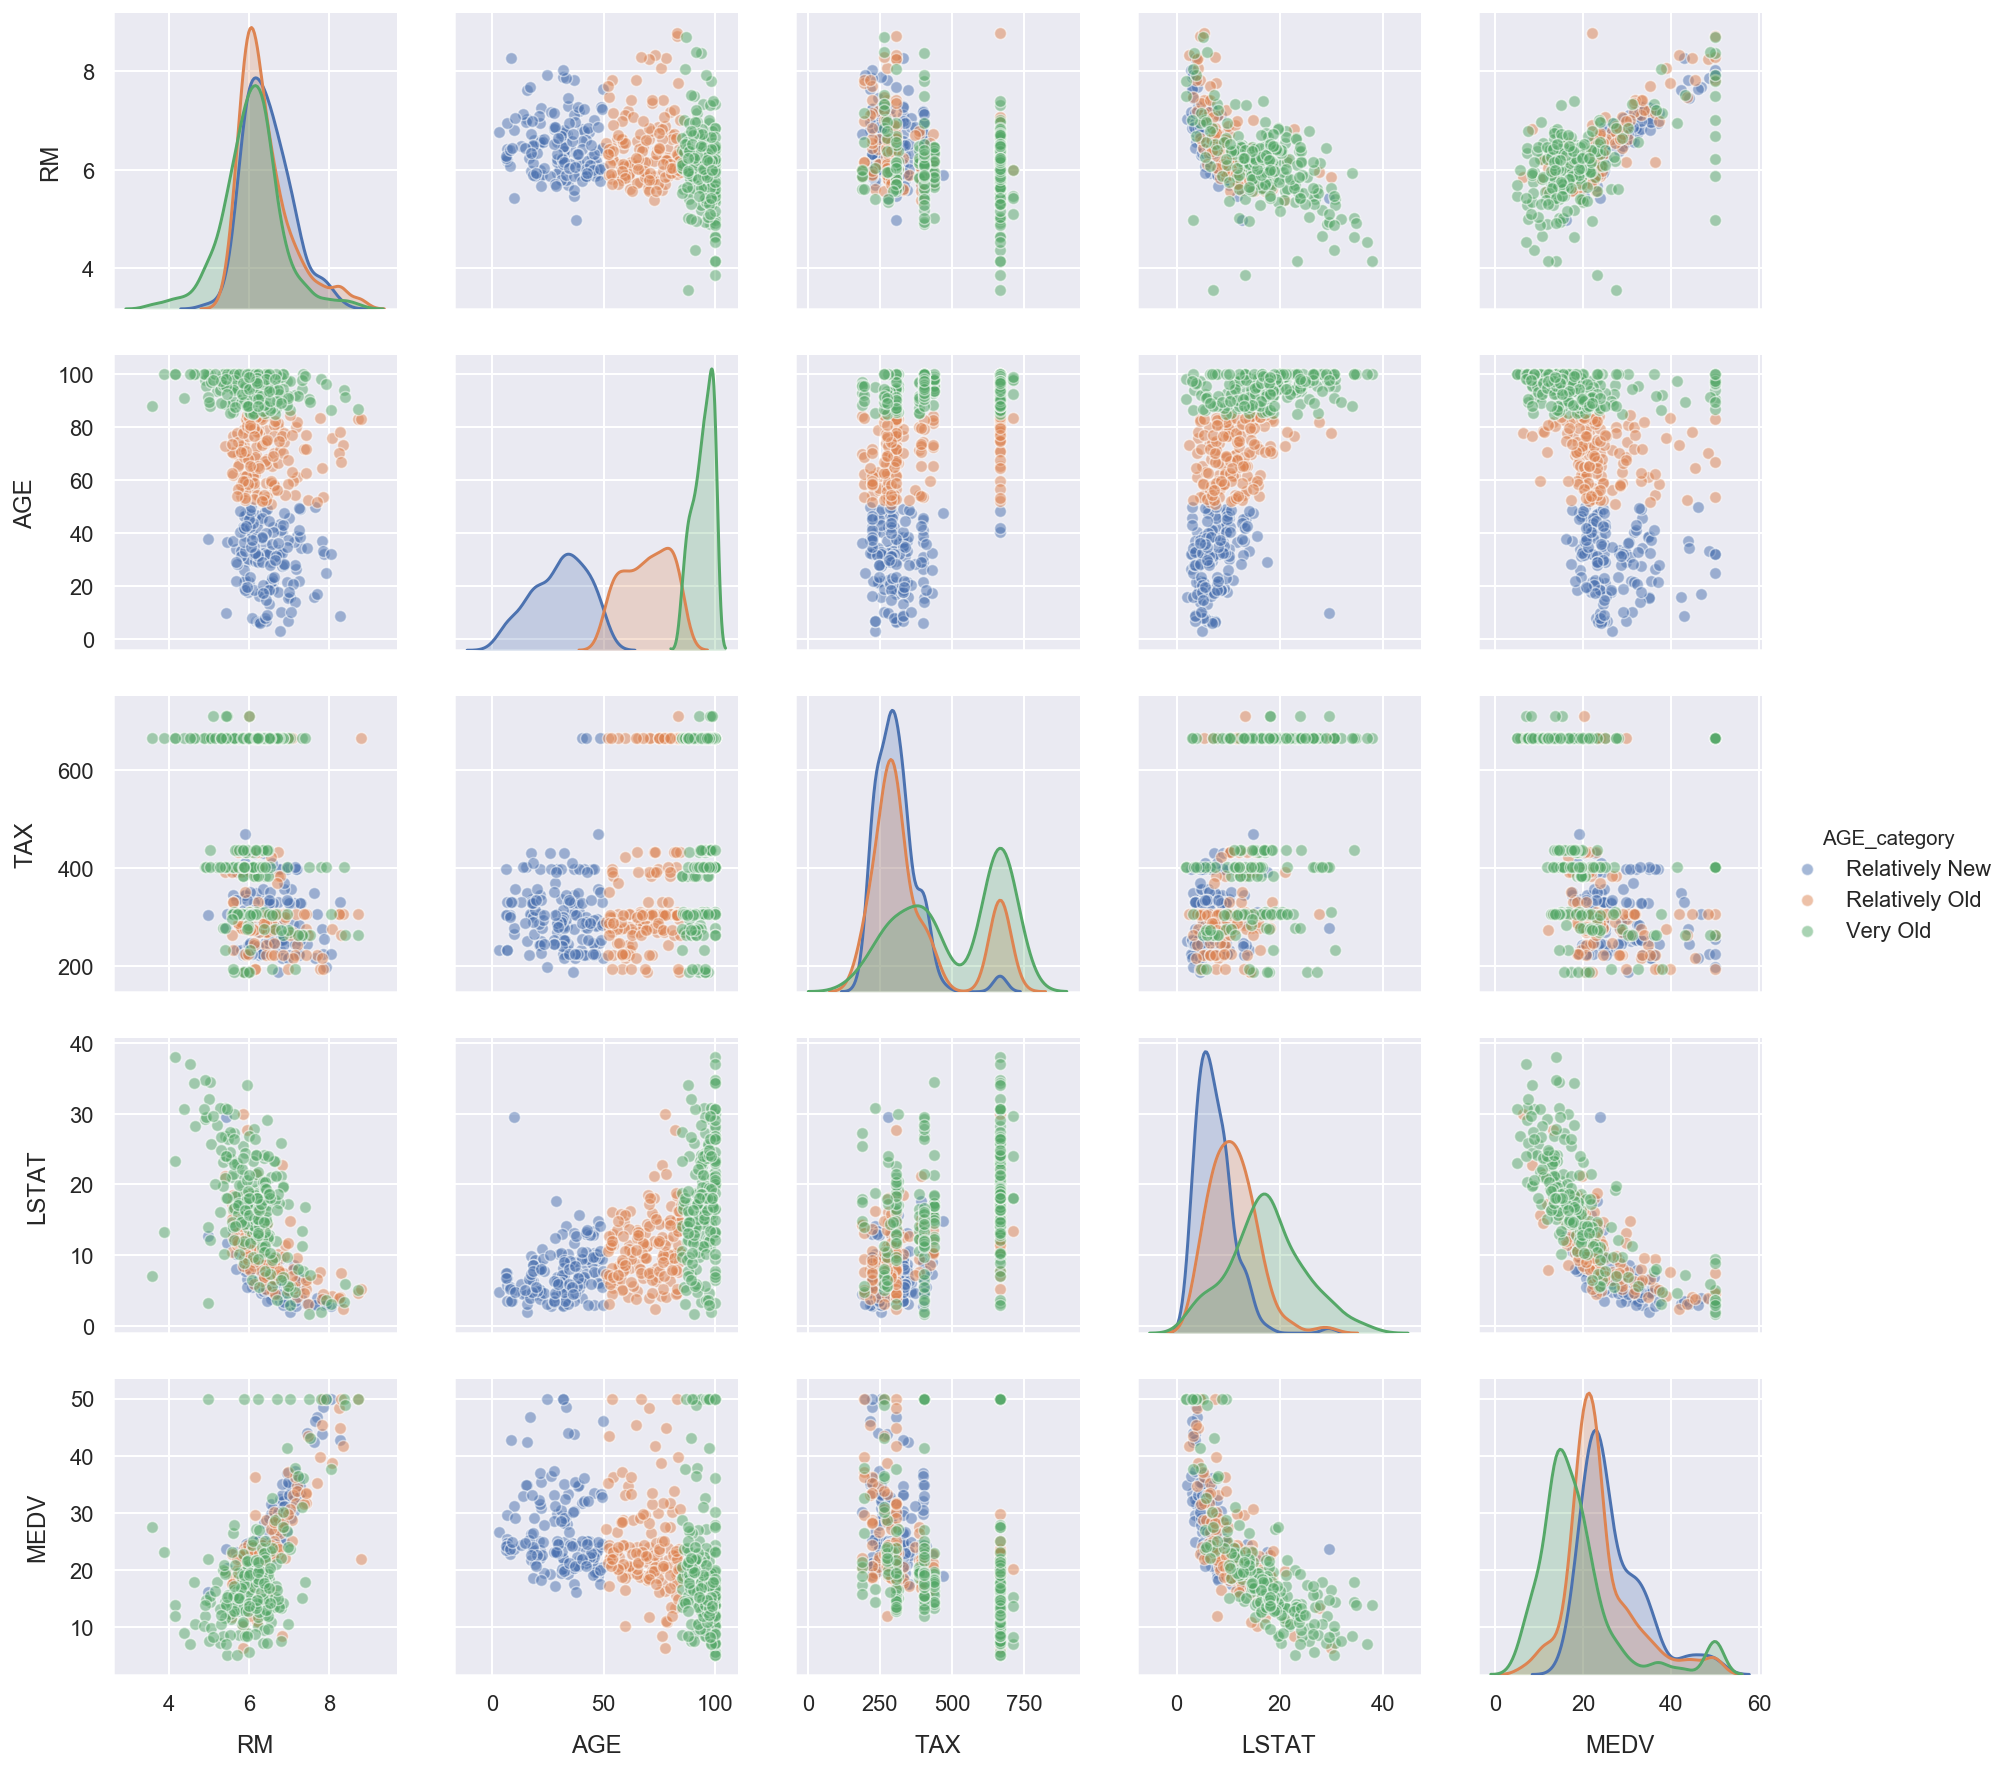

In [43]:
# Color-segmented pair plot

cols = ['RM', 'AGE', 'TAX', 'LSTAT', 'MEDV', 'AGE_category']
sns.pairplot(
    df[cols],
    hue='AGE_category',
    hue_order=['Relatively New', 'Relatively Old', 'Very Old'],
    plot_kws={'alpha': 0.5},
)
plt.savefig(
    '../figures/chapter-3-boston-housing-age-pairplot.png',
    bbox_inches='tight',
    dpi=300,
)

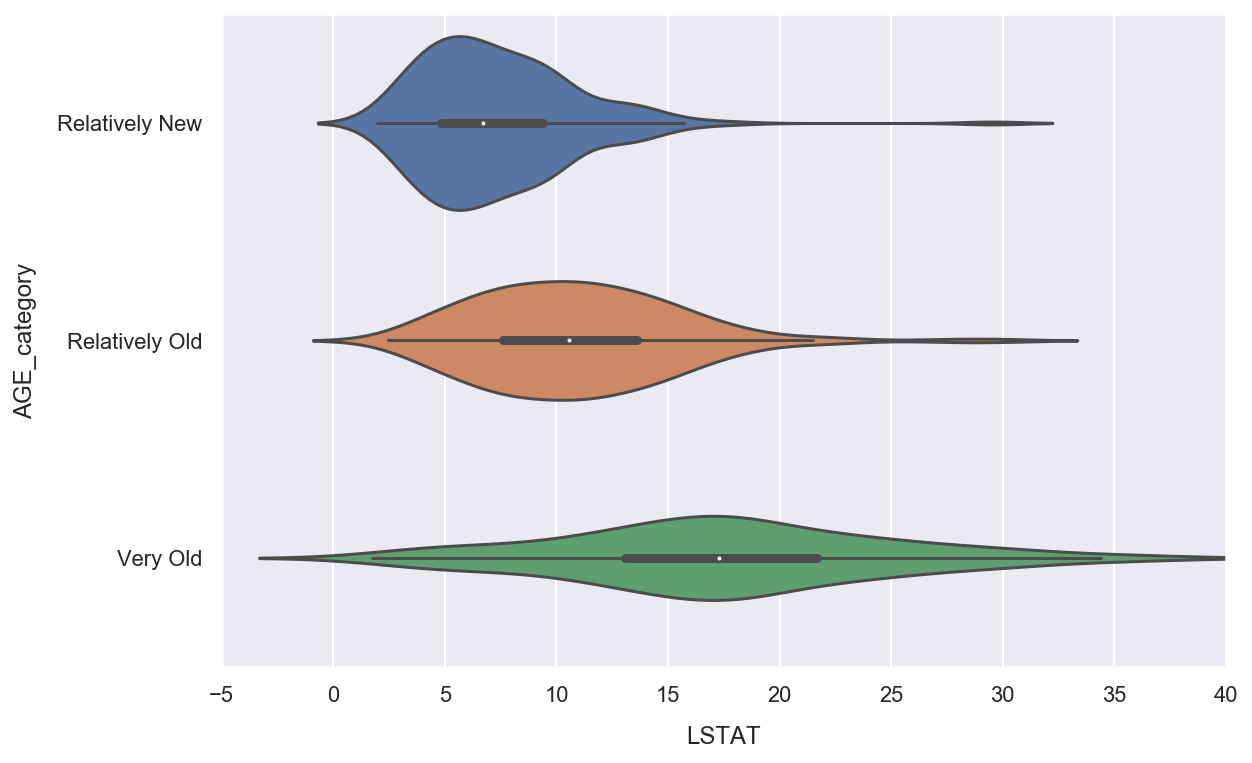

In [44]:
# Look at LSTAT by segment in more detail

sns.violinplot(
    x='LSTAT',
    y='AGE_category',
    data=df,
    order=['Relatively New', 'Relatively Old', 'Very Old'],
)
plt.xlim(-5, 40)
plt.savefig(
    '../figures/chapter-3-boston-housing-lstat-violin.png',
    bbox_inches='tight',
    dpi=300,
)

---

### Activity: Fitting a polynomial regression model

_Note: If desired, the following code can be removed from the student version of the notebook and replaced with empty cells._

---

In [45]:
from sklearn import datasets
boston = datasets.load_boston()
df = pd.DataFrame(
    data=boston['data'],
    columns=boston['feature_names'],
)
df['MEDV'] = boston['target']

In [46]:
y = df['MEDV'].values
x = df['LSTAT'].values.reshape(-1,1)

In [47]:
x[:3]

array([[4.98],
       [9.14],
       [4.03]])

In [48]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)

In [49]:
poly

PolynomialFeatures(degree=3, include_bias=True, interaction_only=False,
                   order='C')

In [50]:
x_poly = poly.fit_transform(x)

In [51]:
x_poly[:3]

array([[  1.      ,   4.98    ,  24.8004  , 123.505992],
       [  1.      ,   9.14    ,  83.5396  , 763.551944],
       [  1.      ,   4.03    ,  16.2409  ,  65.450827]])

In [52]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression(fit_intercept=False)
clf.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [53]:
x_0, x_1, x_2, x_3 = clf.coef_
msg = (
    'model: y = {:.3f} + {:.3f}x + {:.3f}x^2 + {:.3f}x^3'
    .format(x_0, x_1, x_2, x_3)
)
print(msg)

model: y = 48.650 + -3.866x + 0.149x^2 + -0.002x^3


In [54]:
y_pred = clf.predict(x_poly)
resid_MEDV = y - y_pred

In [55]:
resid_MEDV[:10]

array([-8.84025736, -2.61360313, -0.65577837, -5.11949581,  4.23191217,
       -3.56387056,  3.16728909, 12.00336372,  4.03348935,  2.87915437])

In [56]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(y, y_pred)

In [57]:
print('mse = {:.2f}'.format(error))

mse = 28.88


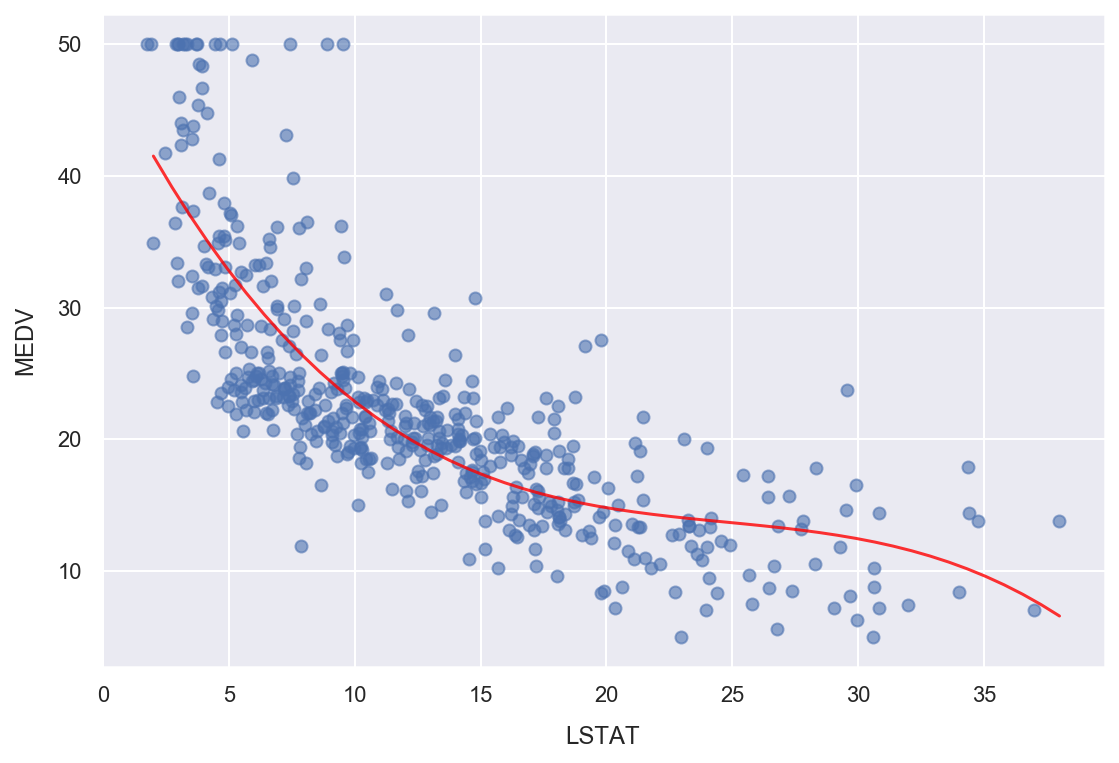

In [58]:
fig, ax = plt.subplots()

# Plot the samples
ax.scatter(x.flatten(), y, alpha=0.6)

# Plot the polynomial model
x_ = np.linspace(2, 38, 50).reshape(-1, 1)
x_poly = poly.fit_transform(x_)
y_ = clf.predict(x_poly)
ax.plot(x_, y_, color='red', alpha=0.8)

ax.set_xlabel('LSTAT')
ax.set_ylabel('MEDV')

plt.savefig(
    '../figures/chapter-3-boston-housing-poly.png',
    bbox_inches='tight',
    dpi=300,
)

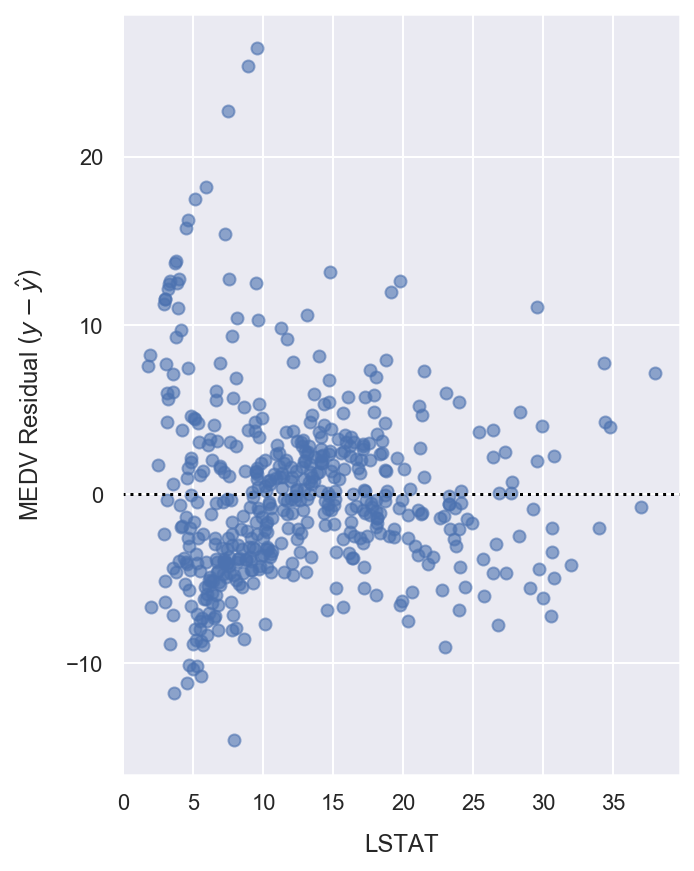

In [59]:
fig, ax = plt.subplots(figsize=(5, 7))
ax.scatter(x, resid_MEDV, alpha=0.6)
ax.set_xlabel('LSTAT')
ax.set_ylabel('MEDV Residual $(y-\hat{y})$')
plt.axhline(0, color='black', ls='dotted')
plt.savefig(
    '../figures/chapter-3-boston-housing-poly-residuals.png',
    bbox_inches='tight',
    dpi=300,
)

---